# Deep Learning入門

## Recurrent Neural Network(RNN) のサンプル

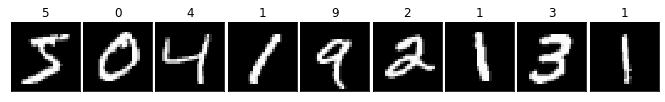

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Bidirectional, Dense, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import model_to_dot, to_categorical

%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.set_title(str(y_train[i]))
    ax.imshow(x_train[i], cmap='gray')

## 前処理

In [22]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

# 名義尺度の値をone-hot表現へ変換
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## モデル作成

In [23]:
# Sequential: ネットワークを1列に積み上げているシンプルな方法
model = Sequential()

model.add(Bidirectional(SimpleRNN(128), input_shape=(28, 28)))
model.add(Dense(10, kernel_initializer='glorot_uniform'))
model.add(Activation('softmax'))

model.compile(
    loss='categorical_crossentropy',
    # optimizer='sgd',
    # 最適化手法として Adam を使用している。
    optimizer=Adam(),
    metrics=['acc']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 256)               40192     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 42,762
Trainable params: 42,762
Non-trainable params: 0
_________________________________________________________________


## モデル可視化

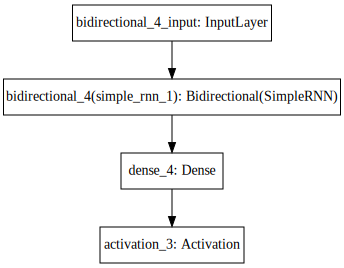

In [24]:
SVG(model_to_dot(model, dpi=72).create(prog='dot', format='svg'))

## モデル学習

In [25]:
history = model.fit(
    x_train, y_train,
    batch_size=200, epochs=20, verbose=1,
    validation_data=(x_test, y_test),
    # 早期終了: 検証データの誤差が大きくなってきた（或いは評価関数値が下がってきた）ところで学習をストップさせる
    callbacks=[EarlyStopping(patience=0, verbose=1)]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 43s 715us/sample - loss: 1.0890 - acc: 0.6235 - val_loss: 0.9159 - val_acc: 0.6818
Epoch 2/20
60000/60000 [==============================] - 37s 613us/sample - loss: 0.8991 - acc: 0.6838 - val_loss: 0.8998 - val_acc: 0.6788
Epoch 3/20
60000/60000 [==============================] - 37s 613us/sample - loss: 0.8666 - acc: 0.6930 - val_loss: 0.8741 - val_acc: 0.7004
Epoch 4/20
60000/60000 [==============================] - 42s 695us/sample - loss: 0.8482 - acc: 0.6990 - val_loss: 0.8747 - val_acc: 0.6911
Epoch 00004: early stopping


## モデル評価

Test loss: 0.874666067314148
Test accuracy: 0.6911


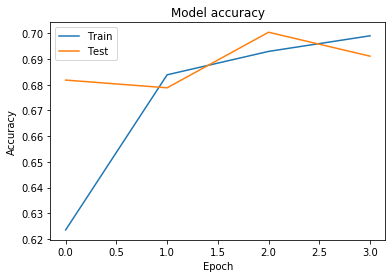

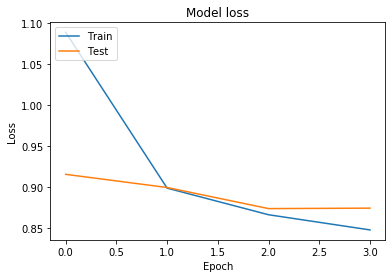

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()